In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
qml.drawer.use_style(style='sketch')

In [3]:
dev = qml.device('default.qubit', wires=['psi', 'a', 'b'])

In [4]:
def teleport(theta):
    # Prepare the state to be teleported
    qml.QubitStateVector([np.cos(theta), np.sin(theta)], wires='psi')
    
    # Prepare the Bell state
    qml.Hadamard(wires='a')
    qml.CNOT(wires=['a', 'b'])

    # Alice applies a reverse bell gate to her qubit, controlled by theta
    qml.CNOT(wires=['psi', 'a'])
    qml.Hadamard(wires='psi')

    qml.Barrier(['psi', 'a'], only_visual=True)

    # Measure alice's qubits
    a1 = qml.measure('psi')
    a2 = qml.measure('a')

    # Send the classical bits to Bob
    qml.cond(a2, qml.PauliX)('b')
    qml.cond(a1, qml.PauliZ)('b')

    return qml.density_matrix(wires='b')

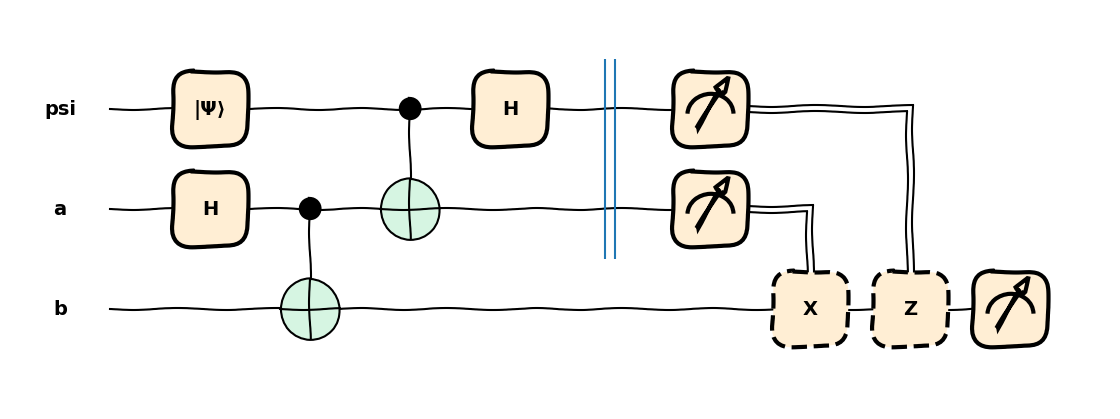

In [5]:
qml.draw_mpl(teleport)(np.pi/4)
plt.show()

**Explanation of the circuit**

1) Prepare the state to be teleported
$$
|\psi\rangle = a|0\rangle + b|1\rangle
$$

2) Create entanglement between Alice and Bob
$$
\text{CNOT}(H\otimes I)(|00\rangle) = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

3) Apply reverse bell circuit to the state to be teleported and Alice's qubit
$$
\begin{aligned}
&|\psi\rangle \otimes \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) = \frac{a}{\sqrt{2}}(|000\rangle + |011\rangle) + \frac{b}{\sqrt{2}}(|100\rangle + |111\rangle) \\
\xrightarrow{\text{CNOT}(\psi, a)}~& \frac{a}{\sqrt{2}}(|000\rangle + |011\rangle) + \frac{b}{\sqrt{2}}(|110\rangle + |101\rangle) \\
\xrightarrow{H\otimes I \otimes I}~& \frac{a}{2}(|000\rangle + |011\rangle + |100\rangle + |111\rangle) + \frac{b}{2}(|010\rangle - |110\rangle + |001\rangle - |101\rangle) \\
=~& \frac{1}{2}|00\rangle\otimes(a|0\rangle + b|1\rangle) + \frac{1}{2}|01\rangle\otimes(a|1\rangle + b|0\rangle) + \frac{1}{2}|10\rangle\otimes(a|0\rangle - b|1\rangle) + \frac{1}{2}|11\rangle\otimes(a|1\rangle - b|0\rangle)
\end{aligned}
$$

4) Alice measures her qubits and sends the result to Bob
   - Measure $|00\rangle$ : Bob does nothing
   - Measure $|01\rangle$ : Bob applies $X$ gate
   - Measure $|10\rangle$ : Bob applies $Z$ gate
   - Measure $|11\rangle$ : Bob applies $Y(=-i Z \circ X)$ gate

5) Bob gets the state $a|0\rangle + b|1\rangle$ which is the state to be teleported

In [9]:
@qml.qnode(dev)
def teleport(theta):
    # Prepare the state to be teleported
    qml.QubitStateVector([np.cos(theta), np.sin(theta)], wires='psi')
    
    # Prepare the Bell state
    qml.Hadamard(wires='a')
    qml.CNOT(wires=['a', 'b'])

    # Alice applies a reverse bell gate to her qubit, controlled by theta
    qml.CNOT(wires=['psi', 'a'])
    qml.Hadamard(wires='psi')

    qml.Barrier(['psi', 'a'], only_visual=True)

    # Measure alice's qubits
    a1 = qml.measure('psi')
    a2 = qml.measure('a')

    # Send the classical bits to Bob
    qml.cond(a2, qml.PauliX)('b')
    qml.cond(a1, qml.PauliZ)('b')

    return qml.probs(wires='b')

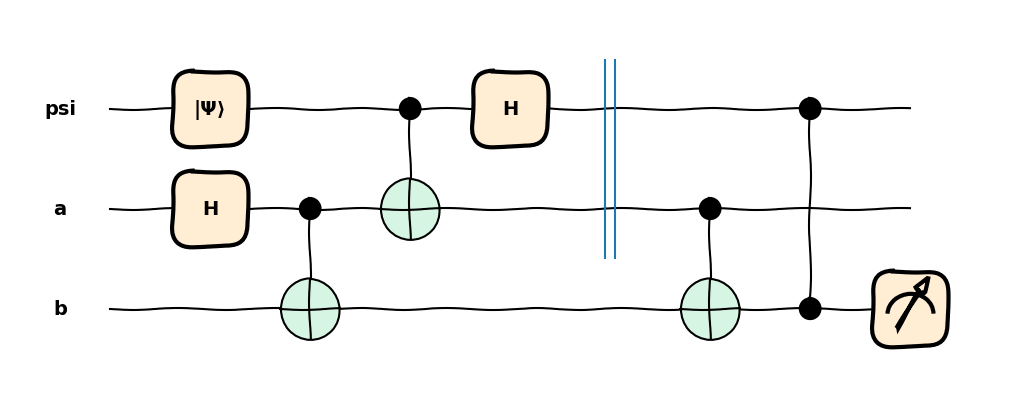

In [10]:
qml.draw_mpl(teleport)(np.pi/4)
plt.show()

In [12]:
theta = np.pi/6
print("Input state: ", np.cos(theta), "|0> +", np.sin(theta), "|1>")
print()
print("Input probability vector: ")
print(np.array([np.cos(theta)**2, np.sin(theta)**2]))
print()
print("Output probability vector: ")
print(teleport(theta))

Input state:  0.8660254037844387 |0> + 0.49999999999999994 |1>

Input probability vector: 
[0.75 0.25]

Output probability vector: 
[0.75 0.25]
